# EDA

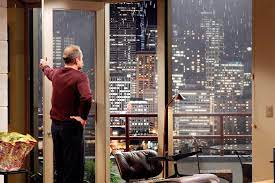

### Import all needed python modules
- Pandas for convenient dataframes.
- numpy get access to all the functions (like aggregate functions) for the dataframes and arrays
- matplotlib and seaborn for the plotting the data

In [37]:
# Import all needed modules.
import warnings

warnings.filterwarnings("ignore")

from datetime import datetime, date, time, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Explore the data
- load the data
- get a feeling for the data 

In [2]:
# Load the data in a pandas dataframe.
df = pd.read_csv('data/King_County_House_prices_dataset.csv')

In [71]:
# Explore the general structure of the data.
df.head()

id sales_date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520 2014-10-13  221900         3      1.000         1180      5650   
1  6414100192 2014-12-09  538000         3      2.250         2570      7242   
2  5631500400 2015-02-25  180000         2      1.000          770     10000   
3  2487200875 2014-12-09  604000         4      3.000         1960      5000   
4  1954400510 2015-02-18  510000         3      2.000         1680      8080   

   floors  waterfront  viewings  ...  grade  sqft_above  sqft_basement  \
0   1.000           0         0  ...      7        1180              0   
1   2.000           0         0  ...      7        2170            400   
2   1.000           0         0  ...      6         770              0   
3   1.000           0         0  ...      7        1050            910   
4   1.000           0         0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0      1955             0    98178 47.511 -122.257           1340        5650  
1      1951          1991    98125 47.721 -122.319           1690        7639  
2      1933             0    98028 47.738 -122.233           2720        8062  
3      1965             0    98136 47.521 -122.393           1360        5000  
4      1987             0    98074 47.617 -122.045           1800        7503  

[5 rows x 21 columns]

In [7]:
# Show number of rows and columns.
print(f'The data set consists of {df.shape[0]} rows and {df.shape[1]} columns.')

The data set consists of 21597 rows and 21 columns.


In [72]:
# Get more info on the data types in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   sales_date     21597 non-null  datetime64[ns]
 2   price          21597 non-null  int64         
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   viewings       21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

There are values missing in:
- `yr_renovated`, a lot of missing values  -> these houses were never renovated?
- `waterfront`, a lot of missing values -> data is divided in 0, NaN and 1. 1 means view to a waterfront from the house and 0 and NaN no view?
- `view`, a few missing values -> these houses have not had any viewings yet. 

There are some columns with data types that have to be changed:
- `yr_renovated` to an integer
- `date` to a date 
- `sqft_basement` to an integer
- `price` to an integer



### First cleaning of the data
- Get rid of NaNs 
- change the data type of some columns

In [67]:
# Change all NaNs to 0 and convert the column to integers.
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].astype('int64')

df['waterfront'] = df['waterfront'].fillna(0)
df['waterfront'] = df['waterfront'].astype('int64')

df['view'] = df['view'].fillna(0)
df['view'] = df['view'].astype('int64')

In [55]:
# Convert date to datetime format 
df['date'] = pd.to_datetime(df['date'])

# Convert the columns to integer
df['price'] = df['price'].astype('int64')

In [60]:
# The square footage of the basement is in strings due to a ? in the column.
df['sqft_basement'] = df['sqft_basement'].str.replace('?', '0')
# The string was replaced by a 0 and is now converted to float.
df['sqft_basement'] = df['sqft_basement'].astype('float64')
# Finally the float is converted to integer.
df['sqft_basement'] = df['sqft_basement'].astype('int64')

In [70]:
# Rename some columns for better understanding of the data.
df.rename(columns={'view':'viewings'}, inplace=True)
df.rename(columns={'date':'sales_date'}, inplace=True)

### First descriptive statistics of the data

In [62]:
df.describe()

id       price  bedrooms  bathrooms  sqft_living  \
count      21597.000   21597.000 21597.000  21597.000    21597.000   
mean  4580474287.771  540296.574     3.373      2.116     2080.322   
std   2876735715.748  367368.140     0.926      0.769      918.106   
min      1000102.000   78000.000     1.000      0.500      370.000   
25%   2123049175.000  322000.000     3.000      1.750     1430.000   
50%   3904930410.000  450000.000     3.000      2.250     1910.000   
75%   7308900490.000  645000.000     4.000      2.500     2550.000   
max   9900000190.000 7700000.000    33.000      8.000    13540.000   

         sqft_lot    floors  waterfront      view  condition     grade  \
count   21597.000 21597.000   21597.000 21597.000  21597.000 21597.000   
mean    15099.409     1.494       0.007     0.233      3.410     7.658   
std     41412.637     0.540       0.082     0.765      0.651     1.173   
min       520.000     1.000       0.000     0.000      1.000     3.000   
25%      5040.000     1.000       0.000     0.000      3.000     7.000   
50%      7618.000     1.500       0.000     0.000      3.000     7.000   
75%     10685.000     2.000       0.000     0.000      4.000     8.000   
max   1651359.000     3.500       1.000     4.000      5.000    13.000   

       sqft_above  sqft_basement  yr_built  yr_renovated   zipcode       lat  \
count   21597.000      21597.000 21597.000     21597.000 21597.000 21597.000   
mean     1788.597        285.717  1971.000        68.758 98077.952    47.560   
std       827.760        439.820    29.375       364.037    53.513     0.139   
min       370.000          0.000  1900.000         0.000 98001.000    47.156   
25%      1190.000          0.000  1951.000         0.000 98033.000    47.471   
50%      1560.000          0.000  1975.000         0.000 98065.000    47.572   
75%      2210.000        550.000  1997.000         0.000 98118.000    47.678   
max      9410.000       4820.000  2015.000      2015.000 98199.000    47.778   

           long  sqft_living15  sqft_lot15  
count 21597.000      21597.000   21597.000  
mean   -122.214       1986.620   12758.284  
std       0.141        685.230   27274.442  
min    -122.519        399.000     651.000  
25%    -122.328       1490.000    5100.000  
50%    -122.231       1840.000    7620.000  
75%    -122.125       2360.000   10083.000  
max    -121.315       6210.000  871200.000

## Stakeholder infos
| Name                | Stakeholder | Characteristics |
| ------------------- | ----------- | ----------------|
| Amy Williams | Seller | Italian mafiosi, sells several central houses(top10%) over time, needs average outskirt houses over time to hide from the FBI |

#### Challenges to overcome
- We need a map, showing which houses are central and which on the outskirts
- We need to filter the prices to find the top 10 and the average prices

#### Questions to answer
 | Question | Hypotheses | Indicators|
 | -------- | ---------- | --------- |
 | Does the condition impact the price of a house? | houses in better condition are pricier| compare condition and price |
 | Does a renovation impact the price of a house | renovated houses are pricier | renovation in the last years five years and price |
 | Does the King County grading system affect the prices of a house? | higher grades mean pricer house | grade and price |
 | Does the average prices differ between central and outskirt houses? | houses closer to city centers are pricier  | geolocation, ZIP code |
 | Does the interior living space differ between outskirt and city? | houses in the outskirts have more space | sqft_livingsquare|
 | Do outskirt houses have larger lot than city houses? | houses in the outskirts have more lot | sqft_lotsquare |
 | Does the square footage of the land lots of the nearest 15 neighbors increase in the outskirts? | the sqft lot increase in non central areas | sqft_lot15 |
 | Does the square footage of the interior living space of the nearest 15 neighbors increase in the outskirts? | the sqft increase in non central areas | sqft_living15 |
 | Are houses in the outskirts are younger? | houses in the outskirts are younger | yr_build |

In [ ]:
# # Create new column for year
# weather_df['year'] = weather_df.date.dt.year

# #Create new column for month
# weather_df['month'] = weather_df.date.dt.month

# # Create new column for year-month
# weather_df['year_month'] = weather_df['date'].dt.strftime('%Y-%m')